In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pickle
import pandas as pd
from scipy import stats
from matplotlib.ticker import FormatStrFormatter
import os

Set paths, fix proportions, seeds and levels:

In [11]:
general_path = 'classif_naive' # path to the results of the classification experiment

plots_path = "results_naive" # path for output plots
if not os.path.exists(plots_path):
    os.makedirs(plots_path)


seeds = ['seed42', 'seed17', 'seed60', 'seed83']
proportions = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Helper functions

In [12]:
def gather_data(general_path, seed, ann_level):
    proportions = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

    # KNN
    metrics_knn = {'male': {}, 'female': {}}
        
    for key in metrics_knn.keys():
        metrics_knn[key] = {
            'accuracy': [],
            'median_f1': [],
            'mean_f1_per_class': [],
            'median_precision': [],
            'mean_prec_per_class': []
            }
    
    # read the file:
    male_lst = []
    female_lst = []
    for p in ['0', '01', '02', '03', '04', '05', '06', '07', '08', '09', '1']:
        male_file_path = f'{general_path}/{seed}/{ann_level}/knn_classif/{p}_male_metrics.pickle'
        female_file_path = f'{general_path}/{seed}/{ann_level}/knn_classif/{p}_female_metrics.pickle'
    
        with open(male_file_path, 'rb') as file:
            male_results = pickle.load(file)
        with open(female_file_path, 'rb') as file:
            female_results = pickle.load(file)
        male_lst.append(male_results)
        female_lst.append(female_results)

    # put them all together
    for i in range(len(male_lst)):
            male_result = male_lst[i]
            female_result = female_lst[i]
        
            metrics_knn['male']['accuracy'].append(male_result['accuracy'] if 'accuracy' in male_result.keys() else np.nan)
            metrics_knn['male']['median_f1'].append(male_result['median_f1']  if 'median_f1' in male_result.keys() else np.nan)
            metrics_knn['male']['median_precision'].append(male_result['median_precision']  if 'median_precision' in male_result.keys() else np.nan)
            metrics_knn['male']['mean_f1_per_class'].append(male_result['f1_scores']  if 'f1_scores' in male_result.keys() else [np.nan]*10)
            metrics_knn['male']['mean_prec_per_class'].append(male_result['precision_scores']  if 'precision_scores' in male_result.keys() else [np.nan]*10)
            
        
            metrics_knn['female']['accuracy'].append(female_result['accuracy'] if 'accuracy' in female_result.keys() else np.nan)
            metrics_knn['female']['median_f1'].append(female_result['median_f1']  if 'median_f1' in female_result.keys() else np.nan)
            metrics_knn['female']['median_precision'].append(female_result['median_precision']  if 'median_precision' in female_result.keys() else np.nan)
            metrics_knn['female']['mean_f1_per_class'].append(female_result['f1_scores']  if 'f1_scores' in female_result.keys() else [np.nan]*10)
            metrics_knn['female']['mean_prec_per_class'].append(female_result['precision_scores']  if 'precision_scores' in female_result.keys() else [np.nan]*10)


    # RF
    metrics_rf = {'male': {}, 'female': {}}
        
    for key in metrics_rf.keys():
        metrics_rf[key] = {
            'accuracy': [],
            'median_f1': [],
            'mean_f1_per_class': [],
            'median_precision': [],
            'mean_prec_per_class': []
            }
    
    # read the file:
    male_lst = []
    female_lst = []
    for p in ['0', '01', '02', '03', '04', '05', '06', '07', '08', '09', '1']:
        male_file_path = f'{general_path}/{seed}/{ann_level}/rf_classif/{p}_male_metrics.pickle'
        female_file_path = f'{general_path}/{seed}/{ann_level}/rf_classif/{p}_female_metrics.pickle'
    
        with open(male_file_path, 'rb') as file:
            male_results = pickle.load(file)
        with open(female_file_path, 'rb') as file:
            female_results = pickle.load(file)
        male_lst.append(male_results)
        female_lst.append(female_results)

    # put them all together
    for i in range(len(male_lst)):
            male_result = male_lst[i]
            female_result = female_lst[i]
        
            metrics_rf['male']['accuracy'].append(male_result['accuracy'] if 'accuracy' in male_result.keys() else np.nan)
            metrics_rf['male']['median_f1'].append(male_result['median_f1']  if 'median_f1' in male_result.keys() else np.nan)
            metrics_rf['male']['median_precision'].append(male_result['median_precision']  if 'median_precision' in male_result.keys() else np.nan)
            metrics_rf['male']['mean_f1_per_class'].append(male_result['f1_scores']  if 'f1_scores' in male_result.keys() else [np.nan]*10)
            metrics_rf['male']['mean_prec_per_class'].append(male_result['precision_scores']  if 'precision_scores' in male_result.keys() else [np.nan]*10)
            
        
            metrics_rf['female']['accuracy'].append(female_result['accuracy'] if 'accuracy' in female_result.keys() else np.nan)
            metrics_rf['female']['median_f1'].append(female_result['median_f1']  if 'median_f1' in female_result.keys() else np.nan)
            metrics_rf['female']['median_precision'].append(female_result['median_precision']  if 'median_precision' in female_result.keys() else np.nan)
            metrics_rf['female']['mean_f1_per_class'].append(female_result['f1_scores']  if 'f1_scores' in female_result.keys() else [np.nan]*10)
            metrics_rf['female']['mean_prec_per_class'].append(female_result['precision_scores']  if 'precision_scores' in female_result.keys() else [np.nan]*10)

    return metrics_knn, metrics_rf

In [13]:
def calculate_mean_variance(data):
    mean_data = np.mean(data, axis=0)
    std_data = np.std(data, axis=0)
    return mean_data, std_data

In [14]:
def gather_accuracies_ann_level(general_path, level, seeds):
    data_knn_male = []
    data_knn_female = []
    data_rf_male = []
    data_rf_female = []

    # loop over seeds and collect data
    for seed in seeds:
        metrics_knn, metrics_rf = gather_data(general_path, seed, level)
        data_knn_male.append(metrics_knn['male']['accuracy'])
        data_knn_female.append(metrics_knn['female']['accuracy'])
        data_rf_male.append(metrics_rf['male']['accuracy'])
        data_rf_female.append(metrics_rf['female']['accuracy'])
    
    # calculate mean and variance
    mean_knn_male, var_knn_male = calculate_mean_variance(data_knn_male)
    mean_knn_female, var_knn_female = calculate_mean_variance(data_knn_female)
    mean_rf_male, var_rf_male = calculate_mean_variance(data_rf_male)
    mean_rf_female, var_rf_female = calculate_mean_variance(data_rf_female)

    return (mean_knn_male, var_knn_male, mean_knn_female, var_knn_female,
            mean_rf_male, var_rf_male, mean_rf_female, var_rf_female)

In [15]:
def gather_f1scores(proportions, general_path, level, seeds):
    data_knn = []
    data_rf = []
    
    for seed in seeds:
        metrics_knn, metrics_rf = gather_data(general_path, seed, level)

        for index, prop in enumerate(proportions):
            for class_index, f1_score in enumerate(metrics_knn['male']['mean_f1_per_class'][index]):
                data_knn.append({
                    'seed': seed,
                    'proportion': prop,
                    'sex': 'male',
                    'class_index': class_index,
                    'F1_score': f1_score
                })
            for class_index, f1_score in enumerate(metrics_knn['female']['mean_f1_per_class'][index]):
                data_knn.append({
                    'seed': seed,
                    'proportion': prop,
                    'sex': 'female',
                    'class_index': class_index,
                    'F1_score': f1_score
                })

            
            for class_index, f1_score in enumerate(metrics_rf['male']['mean_f1_per_class'][index]):
                data_rf.append({
                    'seed': seed,
                    'proportion': prop,
                    'sex': 'male',
                    'class_index': class_index,
                    'F1_score': f1_score
                })
            for class_index, f1_score in enumerate(metrics_rf['female']['mean_f1_per_class'][index]):
                data_rf.append({
                    'seed': seed,
                    'proportion': prop,
                    'sex': 'female',
                    'class_index': class_index,
                    'F1_score': f1_score
                })

    return pd.DataFrame(data_knn), pd.DataFrame(data_rf)

In [16]:
def plot_accuracy(proportions, general_path, level, seeds, title, classif = 'knn'):
    plt.figure(figsize=(10, 5))

    if classif == 'knn':
        (mean_knn_male, var_knn_male, mean_knn_female, var_knn_female,
         _, _, _, _) = gather_accuracies_ann_level(general_path, level, seeds)
    else:
        (_, _, _, _,
         mean_rf_male, var_rf_male, mean_rf_female, var_rf_female) = gather_accuracies_ann_level(general_path, level, seeds)
    
    # Plot the mean accuracy line
    if classif == 'knn':
        plt.plot(proportions, mean_knn_male, color='steelblue', label='Male test set', lw = 2)
        plt.plot(proportions, mean_knn_female, color='darkorange', label='Female test set', lw = 2)
    else:
        plt.plot(proportions, mean_rf_male, color='steelblue', label='Male test set', lw = 2)
        plt.plot(proportions, mean_rf_female, color='darkorange', label='Female test set', lw = 2)
    plt.legend(loc = 'lower left', fontsize = 12)
    
    # Plot the variance area
    if classif == 'knn':
        plt.fill_between(proportions, mean_knn_male - var_knn_male, mean_knn_male + var_knn_male, color='steelblue', alpha=0.3)
        plt.fill_between(proportions, mean_knn_female - var_knn_female, mean_knn_female + var_knn_female, color='lightsalmon', alpha=0.5)
    else:
        plt.fill_between(proportions, mean_rf_male - var_rf_male, mean_rf_male + var_rf_male, color='steelblue', alpha=0.3)
        plt.fill_between(proportions, mean_rf_female - var_rf_female, mean_rf_female + var_rf_female, color='lightsalmon', alpha=0.5)
    
    plt.grid()

    title = title.split('_')[-1]
    plt.title(f'Annotation level {title}', fontsize = 15)
    plt.xlabel('% female samples', fontsize = 15)
    plt.ylabel('Accuracy scores', fontsize = 15)
    if classif == 'knn':
        plt.ylim((0.85, 1))
    else:
        plt.ylim((0.75, 1))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
    plt.gca().tick_params(axis='y', which='major', labelsize=12)
    plt.gca().tick_params(axis='x', which='major', labelsize=12)
    
    plt.savefig(f'{plots_path}/{classif}_acc_{level}.png')
    plt.show()

In [17]:
def plot_f1_boxplot(proportions, general_path, level, seeds, title, classif, outliers=False, stat = 't-test', show_legend = True):
    if classif == 'knn':
        data, _ = gather_f1scores(proportions, general_path, level, seeds)
    else:
        _, data = gather_f1scores(proportions, general_path, level, seeds)

    plt.figure(figsize=(20, 5))


    male_data = data[data['sex'] == 'male'].copy()
    female_data = data[data['sex'] == 'female'].copy()

    positions = range(1, len(proportions) + 1)
    # compute median per class
    f1_medians_male = male_data.groupby(['proportion', 'class_index']).median(numeric_only=True).reset_index()
    f1_medians_female = female_data.groupby(['proportion', 'class_index']).median(numeric_only=True).reset_index()
    # format for plotting
    f1_scores_male = [f1_medians_male[f1_medians_male['proportion'] == prop]['F1_score'].tolist() for prop in proportions]
    f1_scores_female = [f1_medians_female[f1_medians_female['proportion'] == prop]['F1_score'].tolist() for prop in proportions]

    # plot
    bplot1 = plt.boxplot(f1_scores_male, positions=[pos - 0.2 for pos in positions], showfliers=outliers, widths=0.25, patch_artist=True, tick_labels=['male']*len(proportions))
    bplot2 = plt.boxplot(f1_scores_female, positions=[pos + 0.2 for pos in positions], showfliers=outliers, widths=0.25, patch_artist=True, tick_labels=['female']*len(proportions))

    # customize boxplots - fill with colors
    color_label1 = 'steelblue'
    color_label2 = 'lightsalmon'

    for patch, color in zip(bplot1['boxes'], [color_label1] * len(bplot1['boxes'])):
        patch.set_facecolor(color)
        patch.set_alpha(0.8)

    for patch, color in zip(bplot2['boxes'], [color_label2] * len(bplot2['boxes'])):
        patch.set_facecolor(color)
        patch.set_alpha(0.9)

    # customize median lines
    for median_line in bplot1['medians']:
        median_line.set_color('powderblue')
        median_line.set_linewidth(2)

    for median_line in bplot2['medians']:
        median_line.set_color('maroon')
        median_line.set_linewidth(2)

    # create legend
    legend_patch1 = mpatches.Patch(color=color_label1, label='Male test set')
    legend_patch2 = mpatches.Patch(color=color_label2, label='Female test set')
    if show_legend:
        plt.legend(handles=[legend_patch1, legend_patch2], fontsize = 13)

    # perform significance testing
    print('Significance testing p-values:')
    for i, prop in enumerate(proportions):
        male_scores = f1_medians_male[f1_medians_male['proportion'] == prop]['F1_score']
        female_scores = f1_medians_female[f1_medians_female['proportion'] == prop]['F1_score']
        if stat == 't-test':
            _, p_value = stats.ttest_rel(female_scores, male_scores)
        else:
            _, p_value = stats.mannwhitneyu(female_scores, male_scores, alternative='two-sided')

        print(f"{prop} -> {p_value}")
        if p_value < 0.05:
            significance = "*"
        else:
            significance = ""
        
        if significance:
            # we need to get the non-outlier values to see where to place the annotation
            lower_y = min([item.get_ydata().min() for item in bplot1['whiskers'][2*i:2*i+2] + bplot2['whiskers'][2*i:2*i+2]])
            bracket_y, h, col = lower_y - 0.02, 0.01, 'k'
            plt.plot([i + 1 - 0.2, i + 1 - 0.2, i + 1 + 0.2, i + 1 + 0.2], [bracket_y, bracket_y - h, bracket_y - h, bracket_y], lw=1.5, c=col)
            plt.text(i + 1, bracket_y - 3 * h, significance, ha='center', va='bottom', color=col, fontsize=12)

    title = title.split('_')[-1]
    plt.title(title, fontsize = 15)
    plt.xlabel('Proportions', fontsize = 15)
    plt.ylabel('F1 Score', fontsize = 15)
    plt.xticks(positions, proportions, fontsize = 12)
    plt.gca().tick_params(axis='y', which='major', labelsize=12)
    plt.grid()

    plt.savefig(f'{plots_path}/{classif}_f1_{level}.png') 
    plt.show()

# Results per annotation level

## ANN LEVEL 2

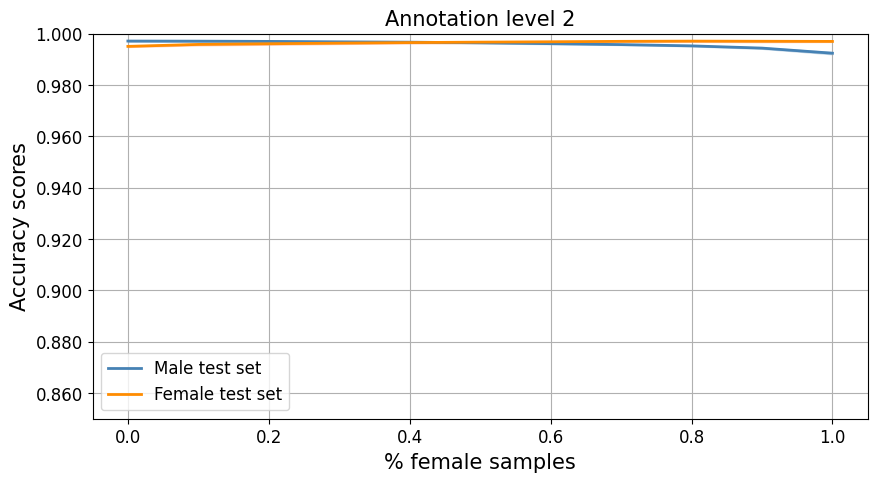

In [18]:
plot_accuracy(proportions, general_path, "ann_2", seeds, "Accuracy with increasing proportion of female samples at ann_2")

Significance testing p-values:
0 -> 0.5103251213253963
0.1 -> 0.809471762018097
0.2 -> 0.3506394542528889
0.3 -> 0.24604424460520116
0.4 -> 0.4917801728494495
0.5 -> 0.6778055005842656
0.6 -> 0.5114735507358741
0.7 -> 0.15494447932432104
0.8 -> 0.9193106061366669
0.9 -> 0.9708906785025255
1 -> 0.4811261395056915


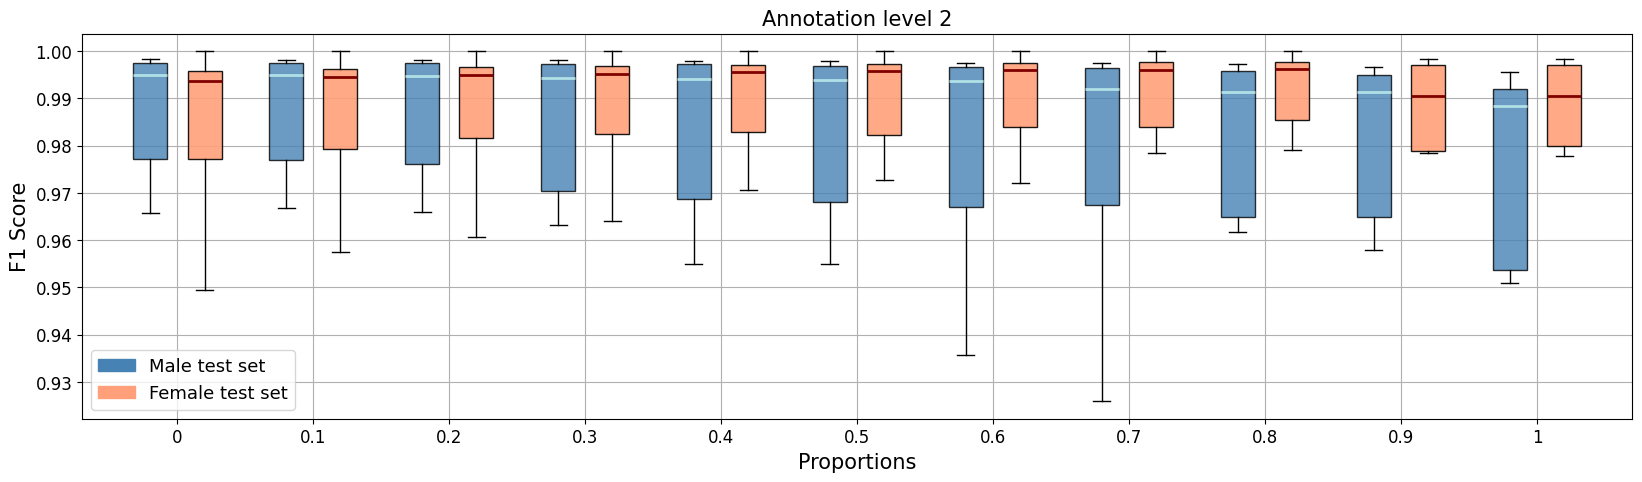

In [19]:
plot_f1_boxplot(proportions, general_path, "ann_2", seeds, "Annotation level 2", classif = 'knn')

## ANN LEVEL 3

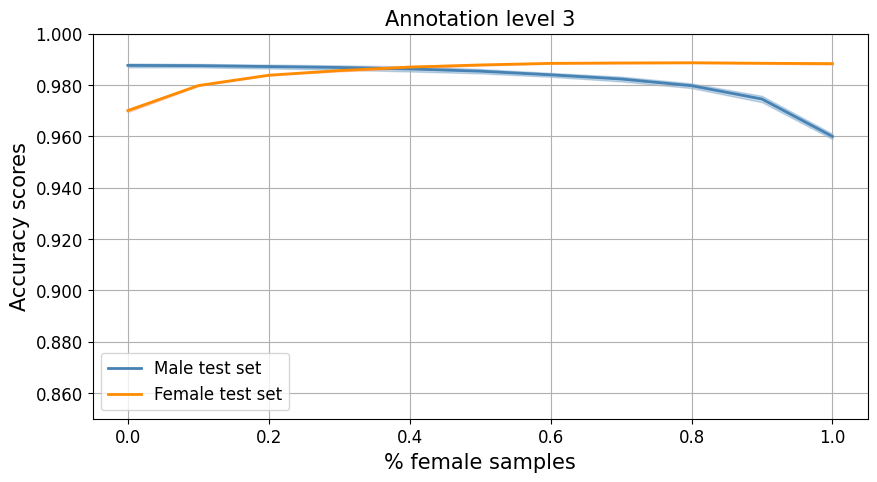

In [20]:
plot_accuracy(proportions, general_path, "ann_3", seeds, "Accuracy with increasing proportion of female samples at ann_3")

Significance testing p-values:
0 -> 0.005868540417768355
0.1 -> 0.227597592360375
0.2 -> 0.7723916621221496
0.3 -> 0.47811411327209397
0.4 -> 0.944988063943141
0.5 -> 0.3250237508862147
0.6 -> 0.7036907730405634
0.7 -> 0.7898987068161736
0.8 -> 0.4457602262052195
0.9 -> 0.8163084020581449
1 -> 0.015425372551988184


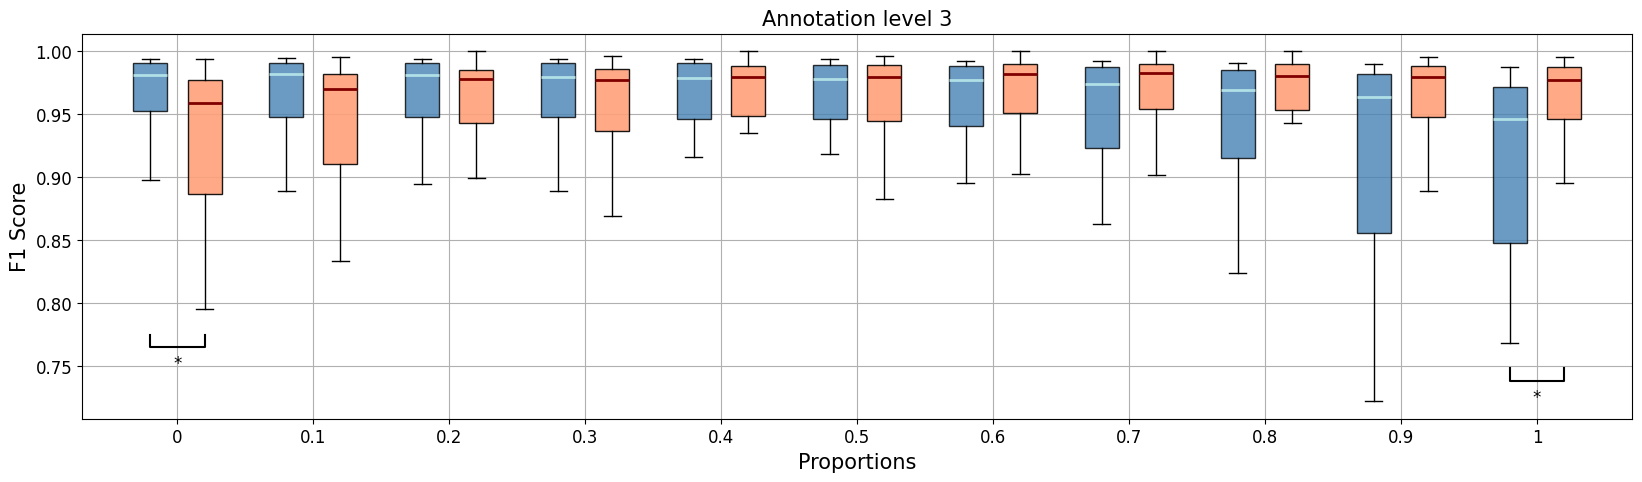

In [21]:
plot_f1_boxplot(proportions, general_path, "ann_3", seeds, "Annotation level 3", classif = 'knn', show_legend = False)

## ANN LEVEL 4

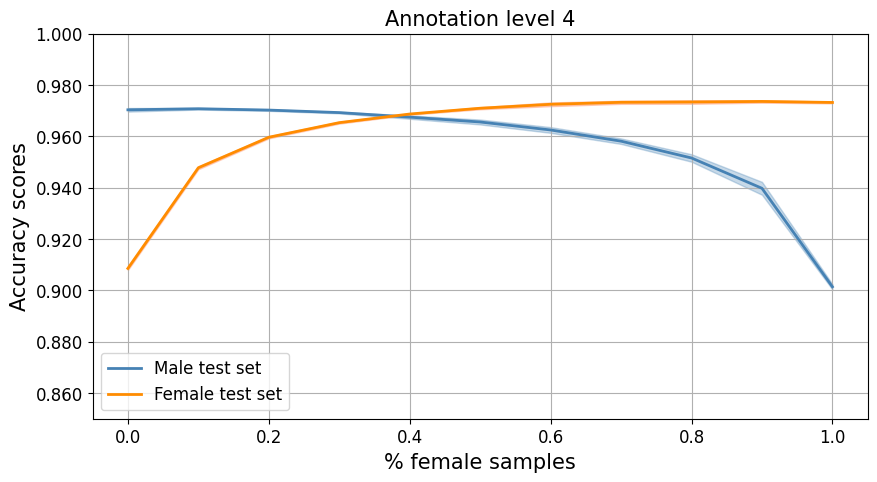

In [22]:
plot_accuracy(proportions, general_path, "ann_4", seeds, "Accuracy with increasing proportion of female samples at ann_4")

Significance testing p-values:
0 -> 1.5456165074788814e-06
0.1 -> 0.0006867223733552012
0.2 -> 0.023849527052412934
0.3 -> 0.043776585413665976
0.4 -> 0.646655850064376
0.5 -> 0.7123915168571424
0.6 -> 0.7809765470739687
0.7 -> 0.3500278863797943
0.8 -> 0.20282853048520819
0.9 -> 0.20527993505099945
1 -> 8.158195853486495e-06


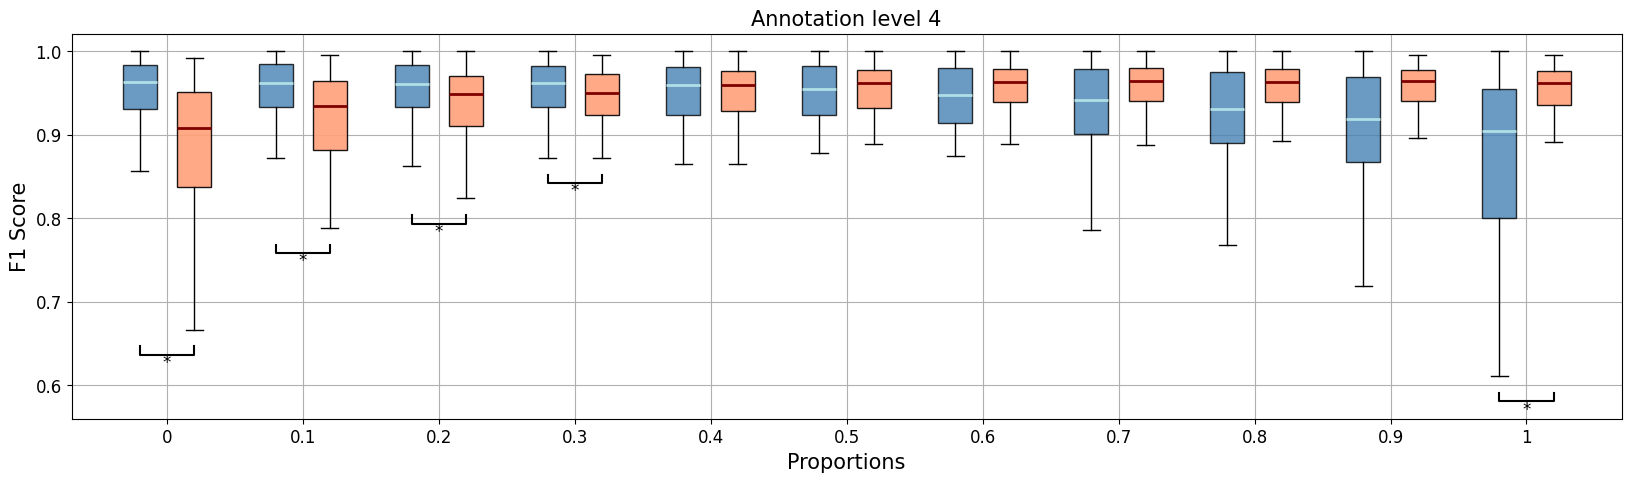

In [23]:
plot_f1_boxplot(proportions, general_path, "ann_4", seeds, "Annotation level 4", classif = 'knn', show_legend = False)

## FINEST ANN LEVEL

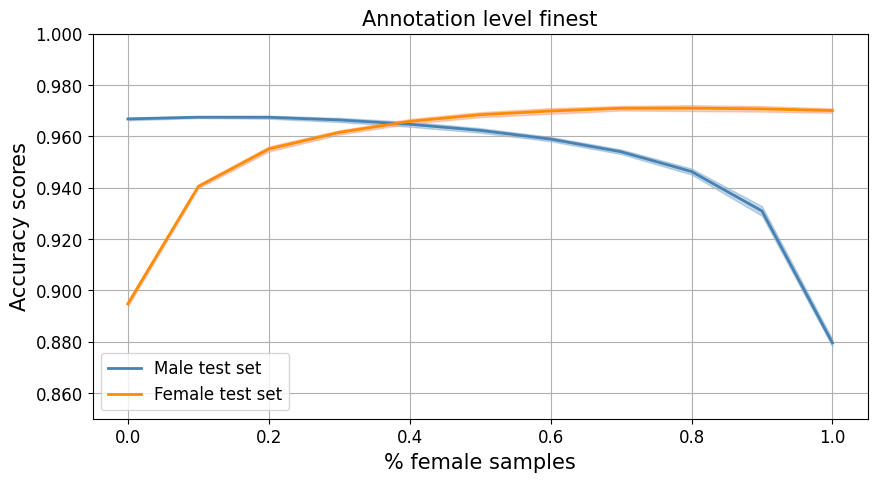

In [24]:
plot_accuracy(proportions, general_path, "ann_finest", seeds, "Accuracy with increasing proportion of female samples at ann_finest")

Significance testing p-values:
0 -> 4.713231449234741e-05
0.1 -> 0.10486701716840652
0.2 -> 0.5765392879678823
0.3 -> 0.9587785120842355
0.4 -> 0.6286514412618851
0.5 -> 0.6900477537431426
0.6 -> 0.16732351738556175
0.7 -> 0.10370557448919428
0.8 -> 0.032151058124862936
0.9 -> 0.011411858286211319
1 -> 3.0982715459423826e-07


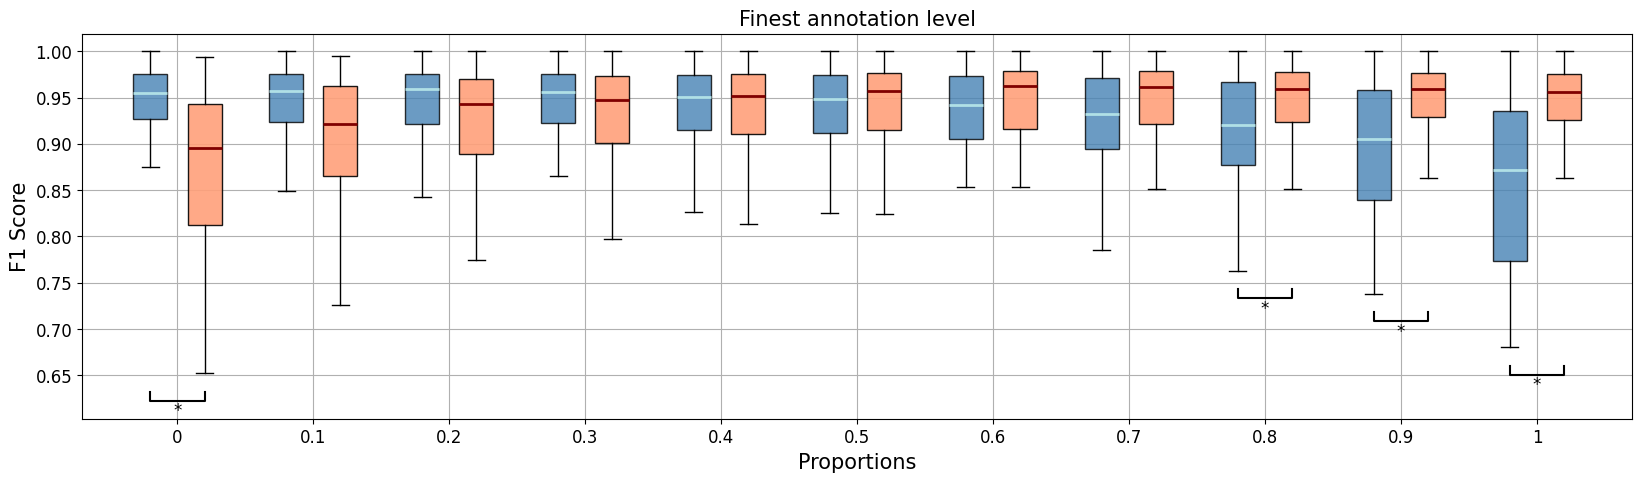

In [25]:
plot_f1_boxplot(proportions, general_path, "ann_finest", seeds, "Finest annotation level", classif = 'knn', show_legend = False)

# Aggregated accuracy results

In [26]:
# function to plot accuracies on all annotation levels
def plot_accuracy_onax(ax, proportions, general_path, level, seeds, title, classif = 'knn', lims = None):
    if classif == 'knn':
        (mean_knn_male, var_knn_male, mean_knn_female, var_knn_female,
         _, _, _, _) = gather_accuracies_ann_level(general_path, level, seeds)
    else:
        (_, _, _, _,
         mean_rf_male, var_rf_male, mean_rf_female, var_rf_female) = gather_accuracies_ann_level(general_path, level, seeds)

    if classif == 'knn':
        ax.plot(proportions, mean_knn_male, color='steelblue', label='Male test set', lw=2)
        ax.plot(proportions, mean_knn_female, color='darkorange', label='Female test set', lw=2)
    else:
        ax.plot(proportions, mean_rf_male, color='steelblue', label='Male test set', lw=2)
        ax.plot(proportions, mean_rf_female, color='darkorange', label='Female test set', lw=2)
    ax.legend(loc='lower left')

    if classif == 'knn':
        ax.fill_between(proportions, mean_knn_male - var_knn_male, mean_knn_male + var_knn_male, color='steelblue', alpha=0.3)
        ax.fill_between(proportions, mean_knn_female - var_knn_female, mean_knn_female + var_knn_female, color='lightsalmon', alpha=0.5)
    else:
        ax.fill_between(proportions, mean_rf_male - var_rf_male, mean_rf_male + var_rf_male, color='steelblue', alpha=0.3)
        ax.fill_between(proportions, mean_rf_female - var_rf_female, mean_rf_female + var_rf_female, color='lightsalmon', alpha=0.5)
    
    ax.grid()
    ax.set_title(title, fontsize = 22)
    ax.set_xlabel('% female samples', fontsize = 20)
    ax.set_ylabel('Accuracy scores', fontsize = 20)
    if classif == 'knn':
        ax.set_ylim((0.85, 1))
    else:
        ax.set_ylim((0.70, 1))
    ax.legend(fontsize=17)

    if lims:
        ax.set_ylim(lims)

    ax.tick_params(axis='x', which='major', labelsize=16) 
    ax.tick_params(axis='y', which='major', labelsize=16) 

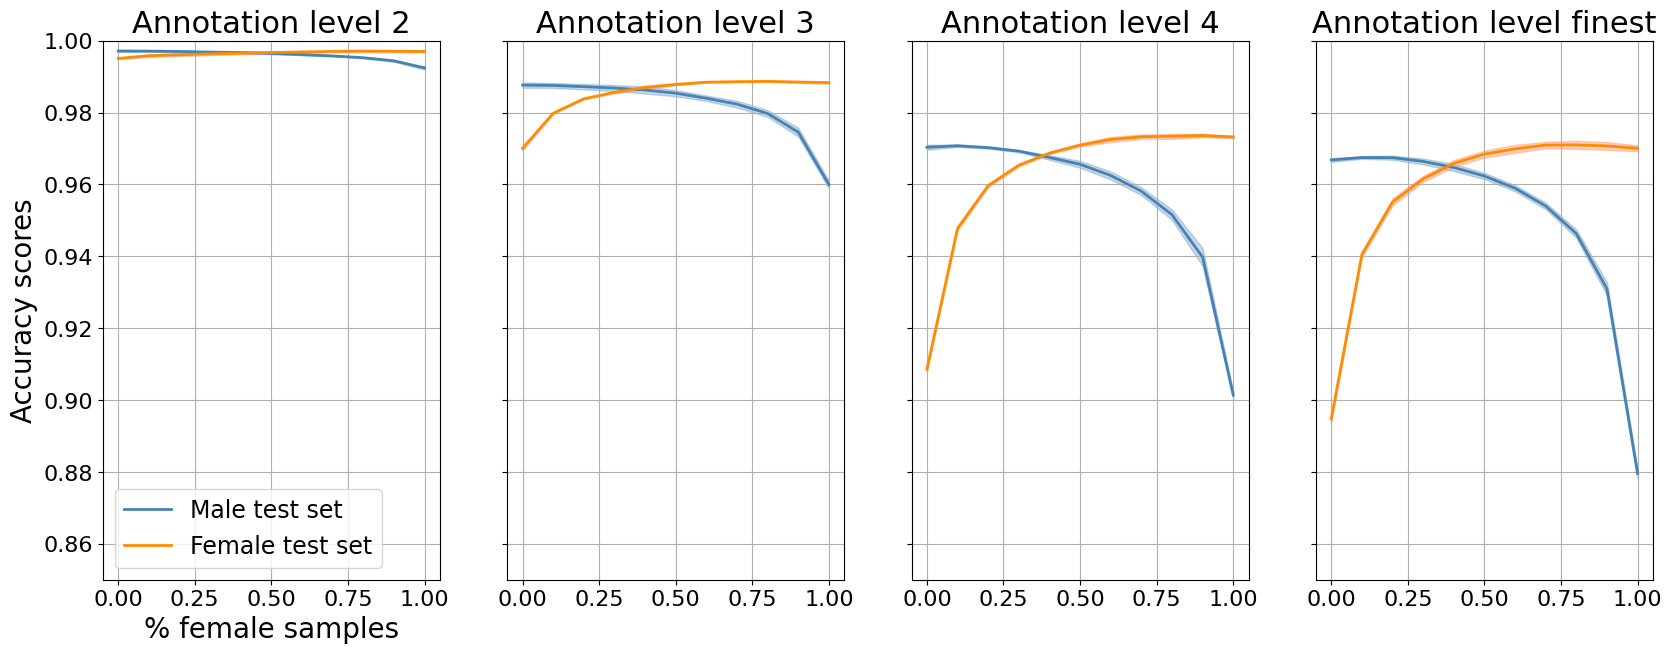

In [27]:
proportions = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
levels = ['ann_2', 'ann_3', 'ann_4', 'ann_finest']

fig, axs = plt.subplots(1, 4, sharey=True, figsize=(20,7))
for ax, level in zip(axs, levels):
    plot_accuracy_onax(ax, proportions, general_path, level, seeds, f"Annotation level {level.split('_')[-1]}")
    if level != levels[0]:
        ax.legend().set_visible(False)  # ensure no legend for other plots
        ax.set_ylabel('') # no y label
        ax.set_xlabel('') # and no x label

plt.savefig(f'{plots_path}/knn_aggregated_acc.png') 
plt.show()

# RF results

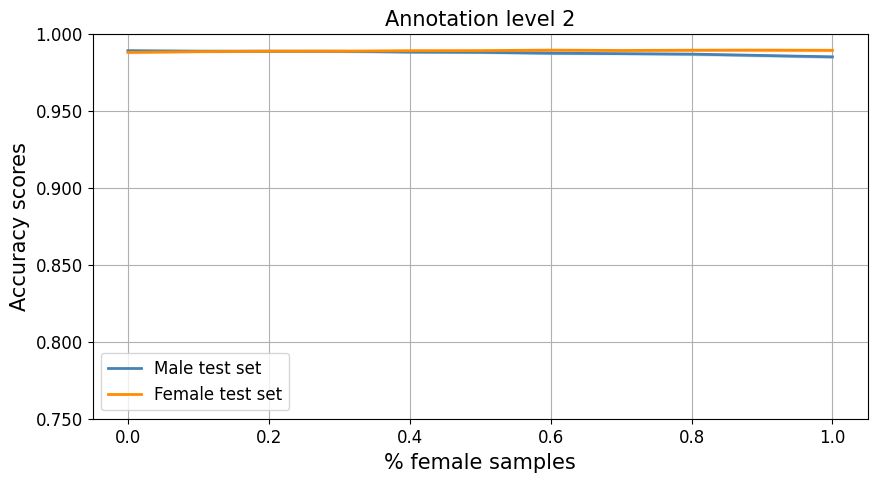

In [28]:
plot_accuracy(proportions, general_path, "ann_2", seeds, "Accuracy with increasing proportion of female samples at ann_2", classif = 'rf')

Significance testing p-values:
0 -> 0.35644391448263646
0.1 -> 0.31227435572490886
0.2 -> 0.3181627782482804
0.3 -> 0.32820797975005833
0.4 -> 0.23909417797393093
0.5 -> 0.30815126086938294
0.6 -> 0.2138250925792891
0.7 -> 0.2545320270007042
0.8 -> 0.16912012229146492
0.9 -> 0.09954804446727943
1 -> 0.10466158696202572


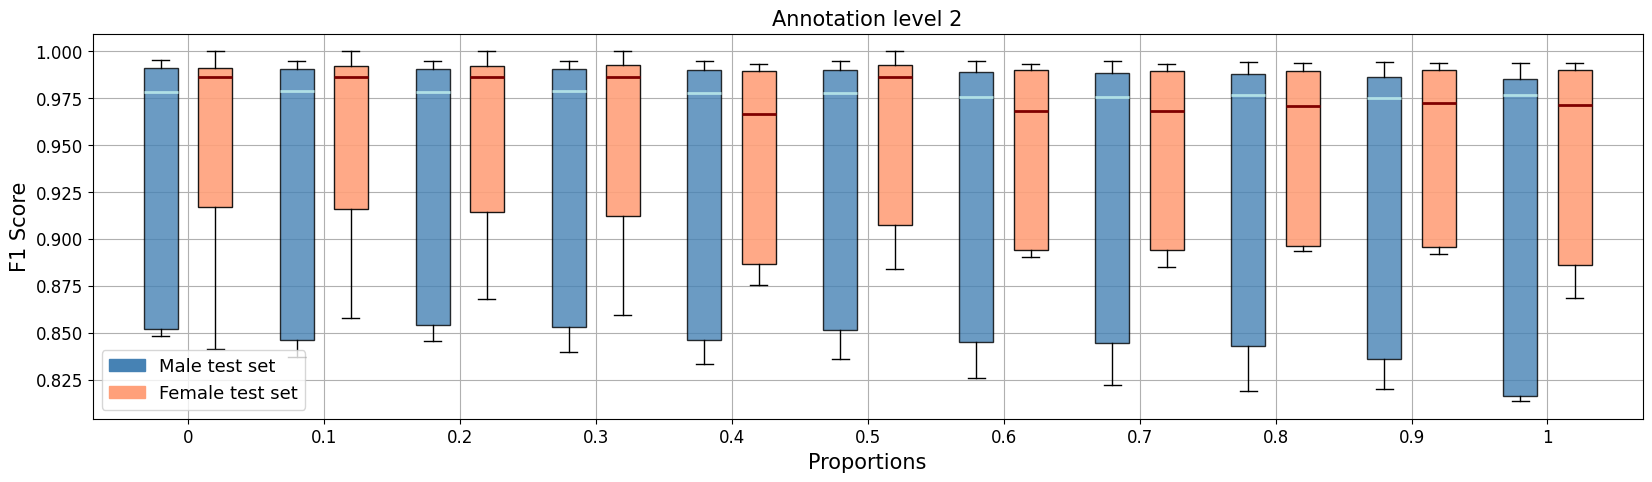

In [29]:
plot_f1_boxplot(proportions, general_path, "ann_2", seeds, "Annotation level 2", classif = 'rf')

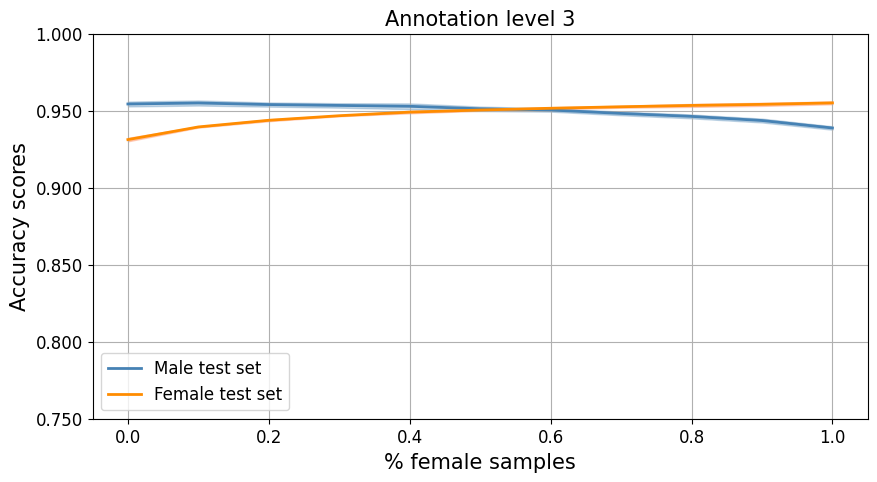

In [30]:
plot_accuracy(proportions, general_path, "ann_3", seeds, "Accuracy with increasing proportion of female samples at ann_3", classif = 'rf')

Significance testing p-values:
0 -> 0.16004080922093672
0.1 -> 0.2851488445841367
0.2 -> 0.21892354255714347
0.3 -> 0.36516714846399057
0.4 -> 0.2654992361573603
0.5 -> 0.4651694748314248
0.6 -> 0.8527207983049465
0.7 -> 0.4576493512420621
0.8 -> 0.13665991052976567
0.9 -> 0.043845760216076834
1 -> 0.03024582668350198


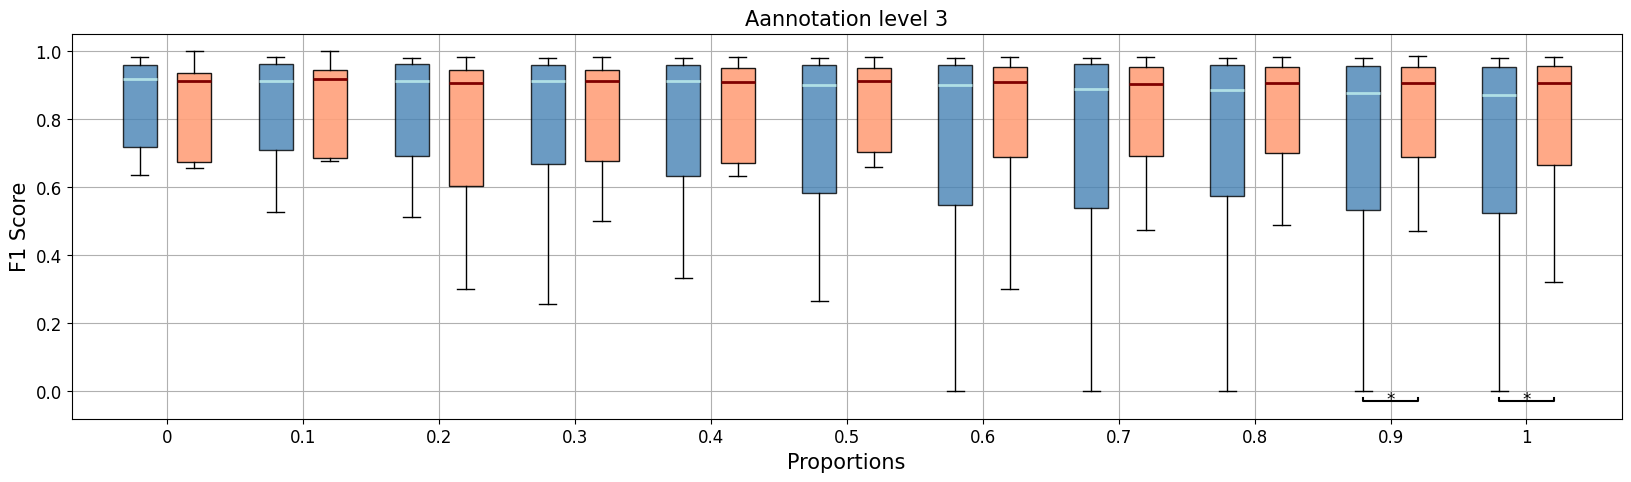

In [31]:
plot_f1_boxplot(proportions, general_path, "ann_3", seeds, "Aannotation level 3", classif = 'rf', show_legend = False)

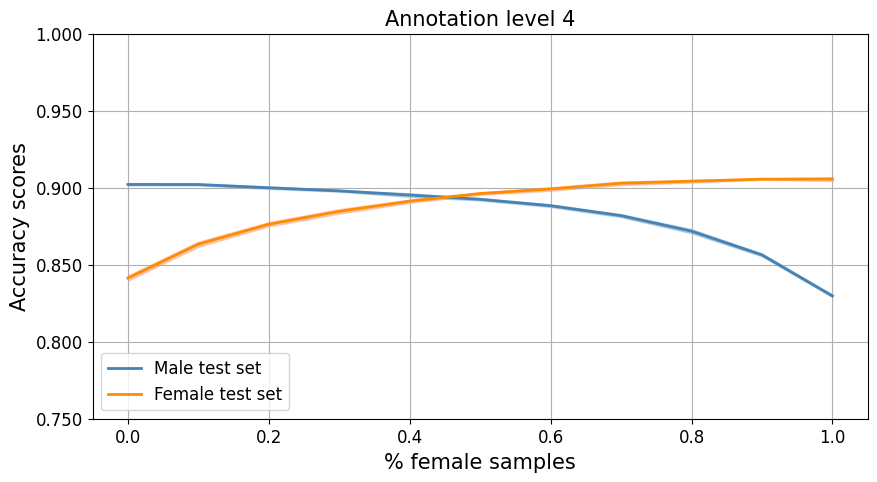

In [32]:
plot_accuracy(proportions, general_path, "ann_4", seeds, "Accuracy with increasing proportion of female samples at ann_4", classif = 'rf')

Significance testing p-values:
0 -> 0.00036066635065488403
0.1 -> 0.005380529607265177
0.2 -> 0.07904355819596234
0.3 -> 0.37811664562891245
0.4 -> 0.6597720828028191
0.5 -> 0.6700479890621646
0.6 -> 0.6184141271115549
0.7 -> 0.14869231367180044
0.8 -> 0.010669643380469461
0.9 -> 0.0007580345381707973
1 -> 1.1865114138039712e-05


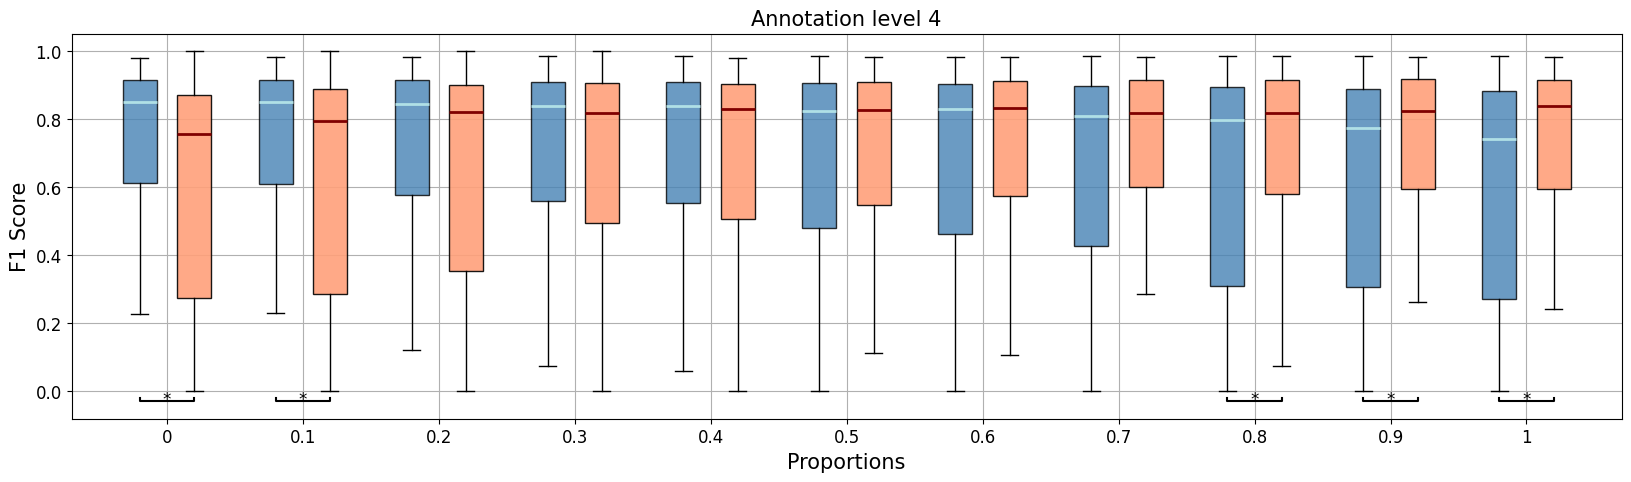

In [33]:
plot_f1_boxplot(proportions, general_path, "ann_4", seeds, "Annotation level 4", classif = 'rf', show_legend = False)

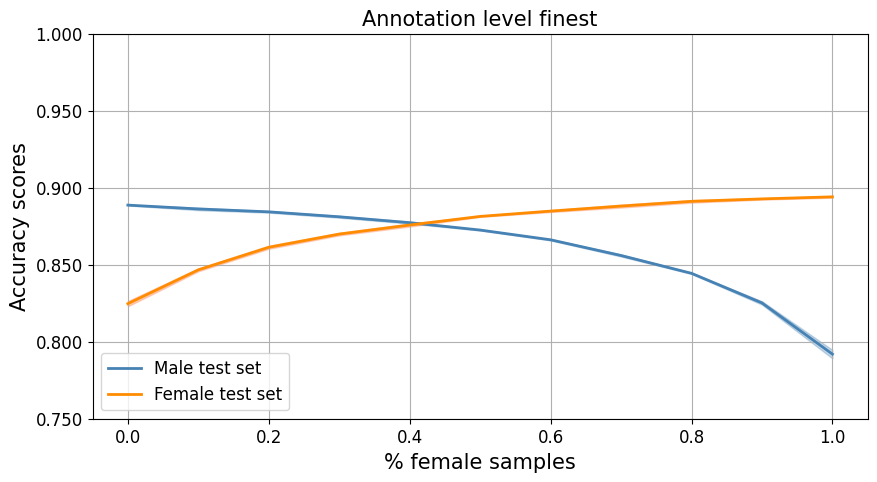

In [34]:
plot_accuracy(proportions, general_path, "ann_finest", seeds, "Accuracy with increasing proportion of female samples at ann_finest", classif = 'rf')

Significance testing p-values:
0 -> 2.97707302077506e-05
0.1 -> 0.0009178132397746338
0.2 -> 0.005354886847709417
0.3 -> 0.085528948347725
0.4 -> 0.2913207083213674
0.5 -> 0.3551910692631839
0.6 -> 0.6117812162935926
0.7 -> 0.32120904004124223
0.8 -> 0.013040607513326053
0.9 -> 0.00018047927784964302
1 -> 1.9544785080207607e-07


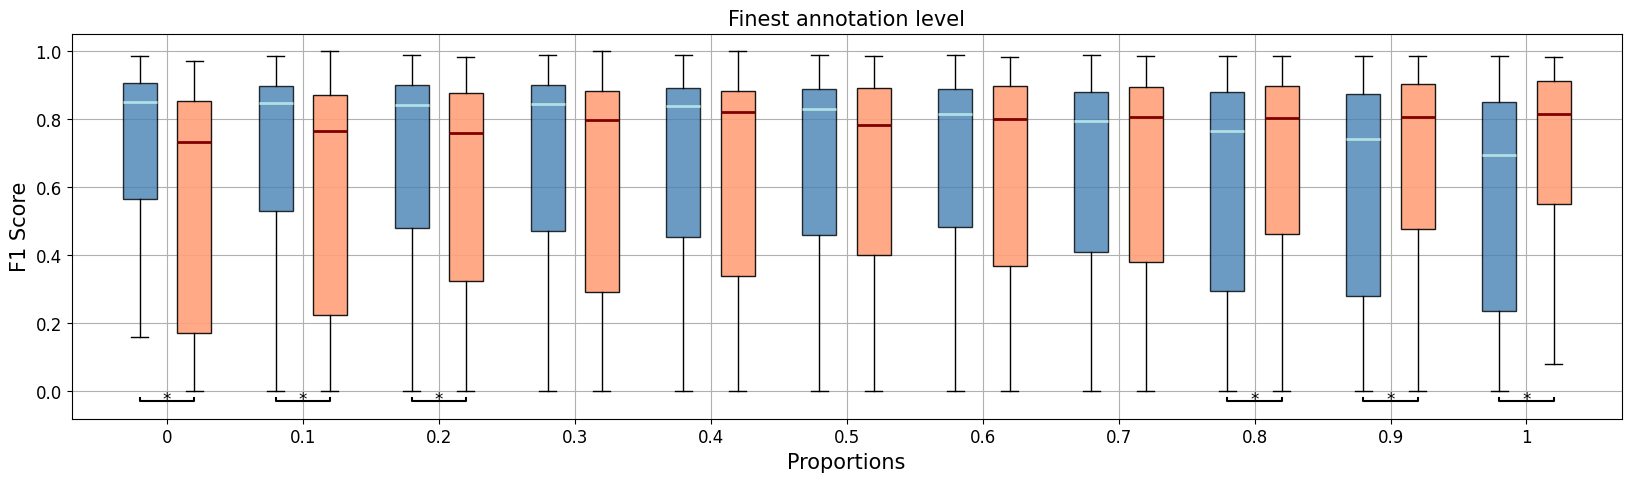

In [35]:
plot_f1_boxplot(proportions, general_path, "ann_finest", seeds, "Finest annotation level", classif = 'rf', show_legend = False)

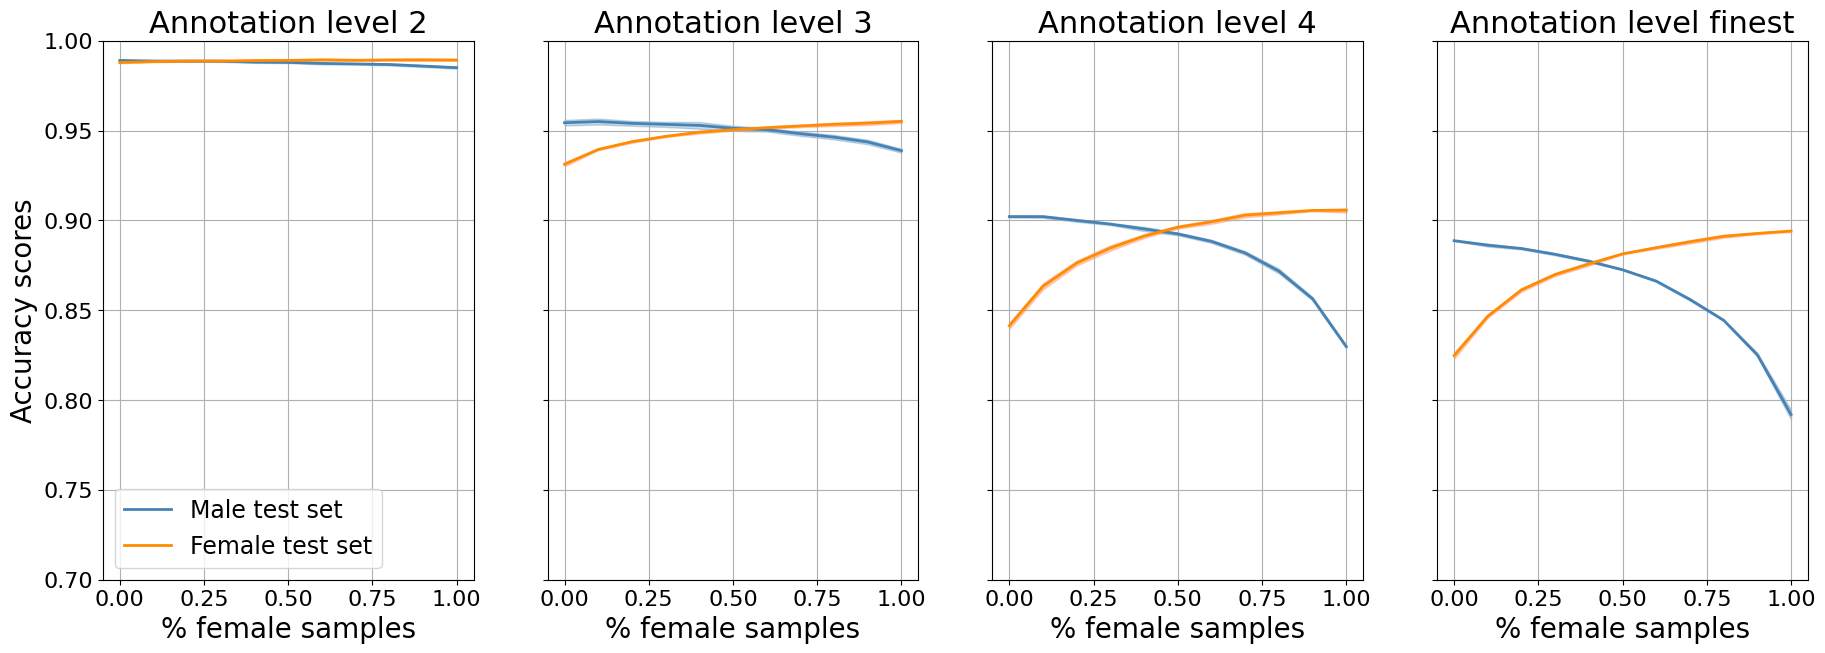

In [36]:
proportions = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
levels = ['ann_2', 'ann_3', 'ann_4', 'ann_finest']

fig, axs = plt.subplots(1, 4, sharey=True, figsize=(22,7))
for ax, level in zip(axs, levels):
    plot_accuracy_onax(ax, proportions, general_path, level, seeds, f"Annotation level {level.split('_')[-1]}", 'rf')
    if level != levels[0]:
        ax.legend().set_visible(False)  # ensure no legend for other plots
        ax.set_ylabel('') # and y label

plt.savefig(f'{plots_path}/rf_aggregated_acc.png') 
plt.show()